[Download Dataset Here](https://drive.usercontent.google.com/download?id=1DRdLKOinSNuoMwVyFGH86f3xEhkZMrz6&export=download&authuser=0)

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Loading the dataset
data = pd.read_csv('/content/customer_support_tickets.csv')

In [ ]:
# Exploring the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
# Descriptive statistics
print(data.describe())

         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


**1.Cleaning Data**

In [ ]:
# Handle missing values
data = data.dropna()  # Drop rows with missing values (custom handling can be done if required)

# Remove duplicates
data = data.drop_duplicates()

In [ ]:
# Convert date columns to datetime format
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

# Standardize categorical data (e.g., gender)
data['Customer Gender'] = data['Customer Gender'].str.capitalize()

In [ ]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0


In [ ]:
# Print column names
print(data.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


Exploratory Data Analysis

In [ ]:
#Analyze customer support ticket trends
# Identify common issues
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)



Top 10 Common Issues:
Ticket Subject
Network problem           201
Software bug              199
Product compatibility     195
Product recommendation    186
Product setup             183
Hardware issue            183
Delivery problem          178
Refund request            178
Battery life              173
Account access            171
Name: count, dtype: int64


In [ ]:
#plotting ticket trends oveertime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()
ticket_trends = data.groupby('YearMonth').size()


**1.Trends of customer support tickets over time**

**Purpose:**
 By plotting the number of tickets received each month or year, the figure allows us to identify patterns, spikes, or declines in ticket volume.

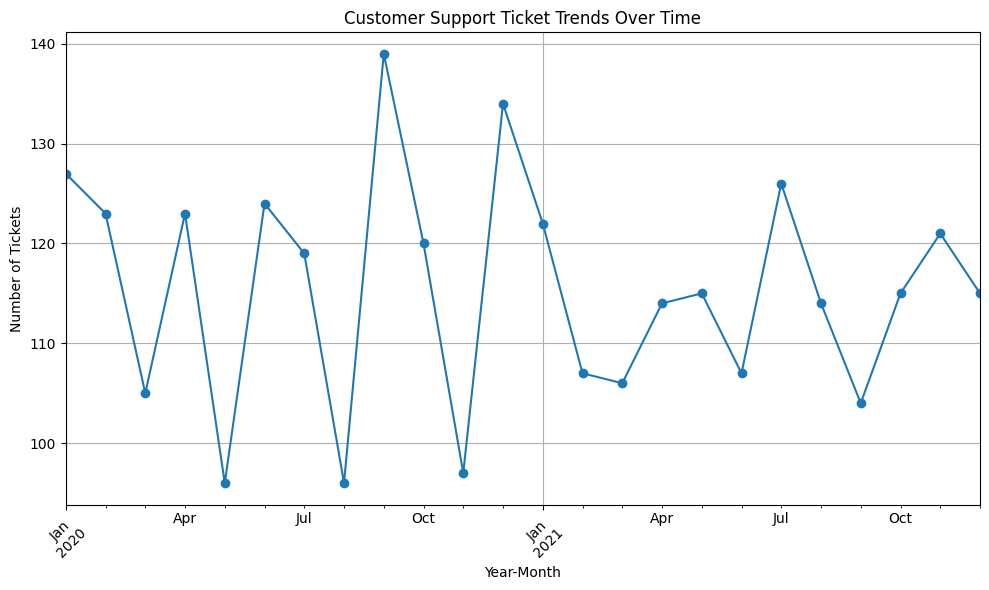

In [ ]:
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Findings:**

The chart reveals trends, seasonality, and anomalies in support ticket volume, enabling proactive issue resolution & resource planning.

Findings may include increasing/decreasing trends, seasonal spikes, sudden changes due to external factors, and outliers needing attention.

In [ ]:
# Segment customers
# Segment based on ticket types
ticket_type_segmentation = data.groupby('Ticket Type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)


Segmentation based on Ticket Types:
Ticket Type
Billing inquiry         544
Cancellation request    516
Product inquiry         533
Refund request          596
Technical issue         580
dtype: int64


In [ ]:
# Segment based on satisfaction levels
satisfaction_segmentation = data.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)
print(satisfaction_segmentation)


Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64





**2.Distribution of Customer Satisfaction Ratings:**

 **Purpose:**
To understand the spread of customer satisfaction ratings.

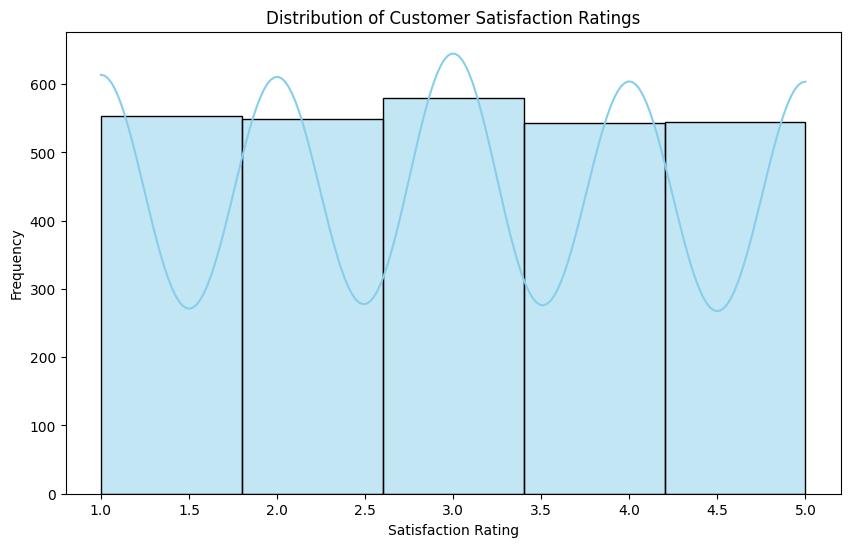

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of satisfaction ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()


**Analysis**: Identifies which ratings dominate (e.g., low satisfaction scores may highlight systemic issues).

**3.Impact of Ticket Priority on Satisfaction:**

**Purpose:**

 Compare satisfaction scores across different ticket priorities

<ipython-input-16-1c2c6ec89b8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=data, palette='coolwarm')


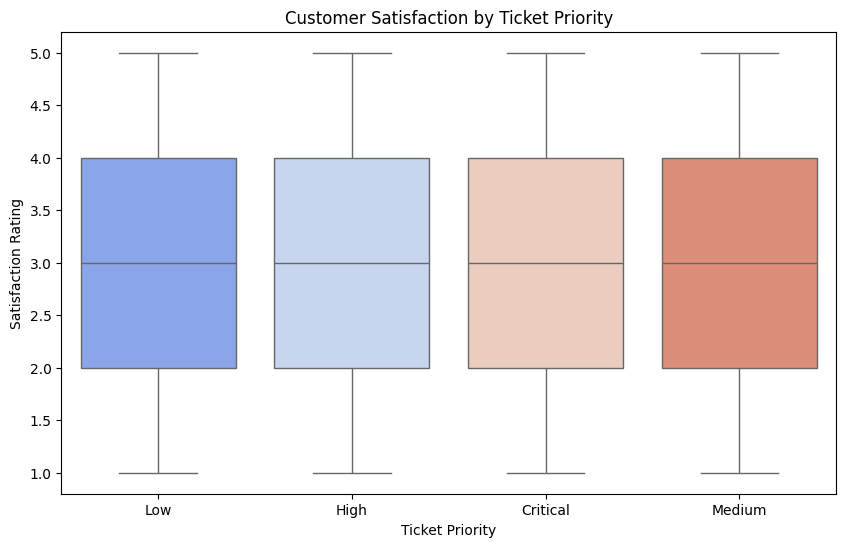

In [ ]:
# Boxplot of satisfaction by ticket priority
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=data, palette='coolwarm')
plt.title('Customer Satisfaction by Ticket Priority')
plt.xlabel('Ticket Priority')
plt.ylabel('Satisfaction Rating')
plt.show()


**Analysis:** High variability in scores for high-priority tickets might suggest inconsistent handling.


**4.Resolution Time vs Customer Satisfaction**

**Purpose:**

to reveal if there's a correlation between these two variables.

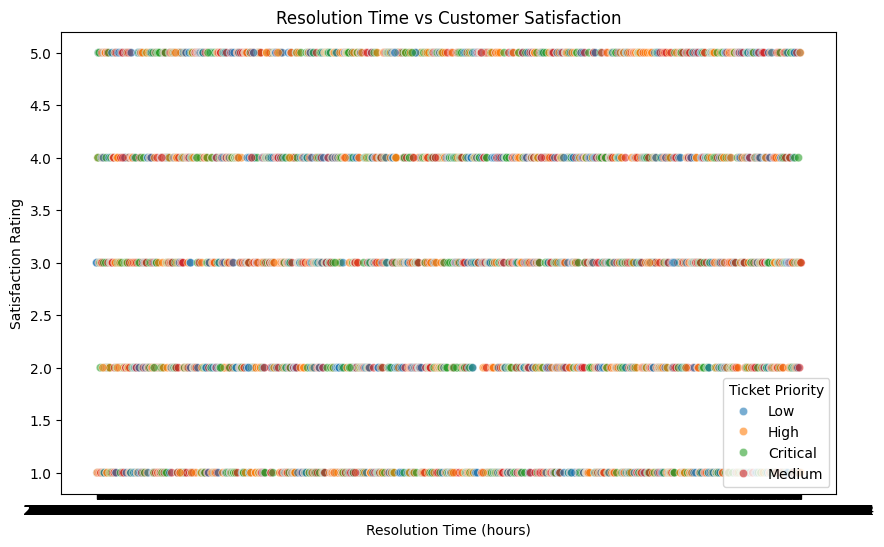

In [ ]:
# Scatter plot of resolution time vs. satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time to Resolution', y='Customer Satisfaction Rating', data=data, alpha=0.6, hue='Ticket Priority')
plt.title('Resolution Time vs Customer Satisfaction')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Satisfaction Rating')
plt.show()


**Analysis:** Negative trends indicate faster resolutions lead to higher satisfaction.



**Feature Engineering**

In [ ]:
# Time since purchase (days)
data['Days Since Purchase'] = (pd.Timestamp.now() - data['Date of Purchase']).dt.days

# Encode ticket priority (e.g., Low = 1, High = 4)
priority_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}
data['Priority Level'] = data['Ticket Priority'].map(priority_mapping)

# Save engineered data
data.to_csv('engineered_customer_support_tickets.csv', index=False)


In [ ]:
data


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,YearMonth,Days Since Purchase,Priority Level
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020-07,1651,1
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020-11,1529,1
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020-02,1812,1
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,2021-01,1462,3
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,2021-10,1184,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,Craig Forbes,jessica60@example.org,62,Female,MacBook Pro,2020-03-29,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Interesting show must successful.,Critical,Phone,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0,2020-03,1758,4
8453,8454,Paula Vazquez,wanderson@example.com,61,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,Skill expect admit and.,High,Chat,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0,2020-06,1675,3
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,High,Email,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0,2021-02,1448,3
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,2021-08,1252,3


**Predictive**
**Modeling**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Features and target
# X = data[['Time to Resolution', 'First Response Time', 'Priority Level']]
# y = data['Customer Satisfaction Rating']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Model training
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Predictions and evaluation
# y_pred = rf_model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


Visualizations


**5. Ticket Type Segmentation**

**Purpose:**

To analyze ticket distribution by type (technical, billing, inquiry, etc.).

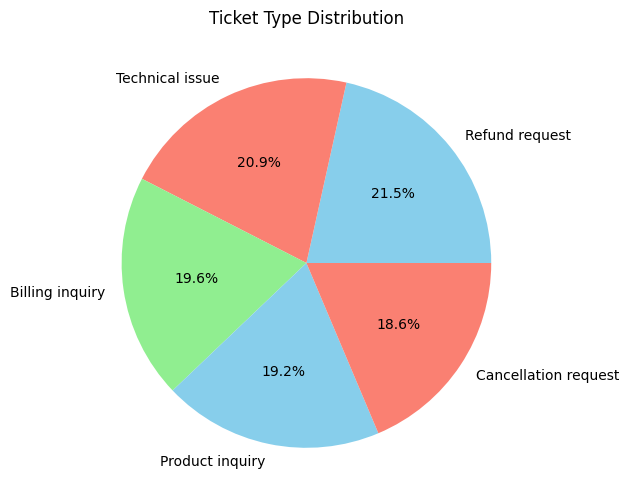

In [ ]:
ticket_type_distribution = data['Ticket Type'].value_counts()

plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()


**Analysis:**
Pie charts highlight which ticket types dominate support requests.

 **Findings:**

Technical issues form the majority, suggesting product complexity or defects.
Billing and product inquiries are less frequent but still critical.





**6. Ticket Priority Distribution**

**Purpose:**

To visualize the distribution of ticket priorities.

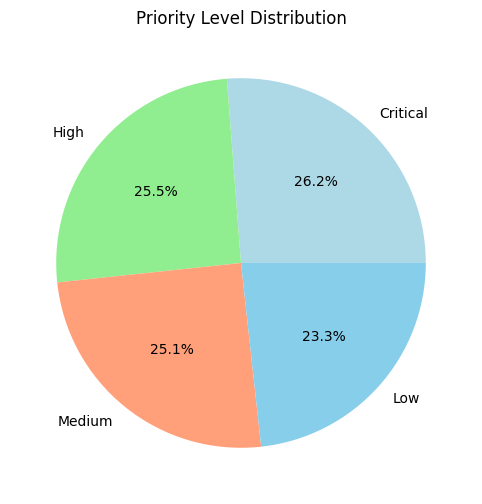

In [ ]:
priority_distribution = data['Ticket Priority'].value_counts()

plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()


**Analysis:**

This pie chart shows the proportions of low, medium, high, and critical tickets.

**Findings:**

Medium-priority tickets dominate, while critical tickets form a small percentage.

**7. Age Distribution**

**Purpose:**

To understand the age demographics of customers.

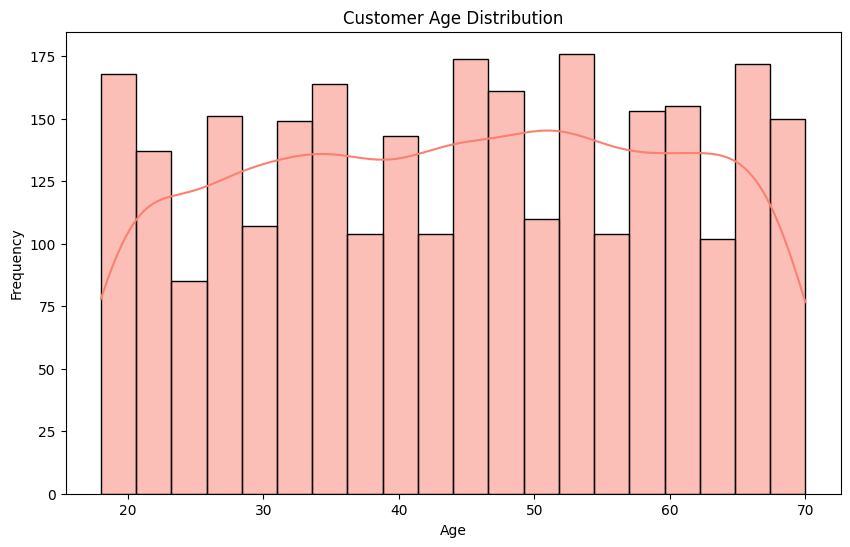

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True, color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Analysis:**

Histograms display the age groups most commonly interacting with support.

**Findings:**

The majority of customers are in their 30s and 40s, likely representing working professionals.

**8. Satisfaction by Gender**

**Purpose:**

To compare satisfaction scores by gender.

<ipython-input-28-b1ddeb2bb558>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted')


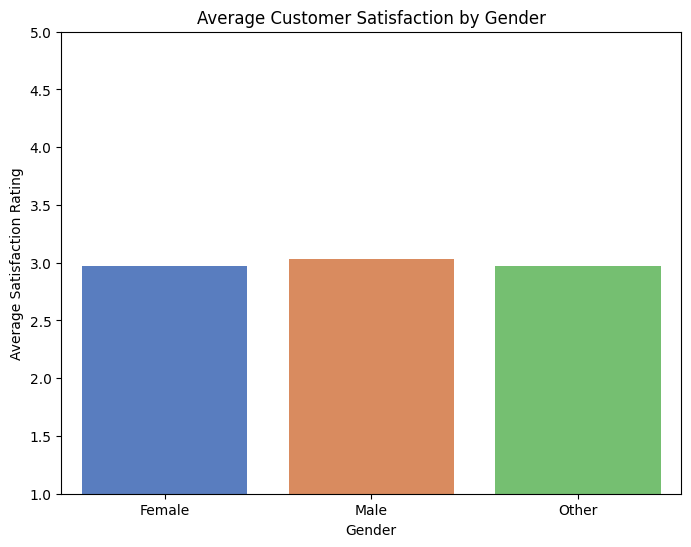

In [ ]:
average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted')
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5)
plt.show()


**Analysis:**

Bar plots reveal gender-specific satisfaction trends.

**Findings**:

Female customers report slightly higher satisfaction on average.



**9. Ticket Channel Distribution**

**Purpose:**

To examine ticket volume by channel.

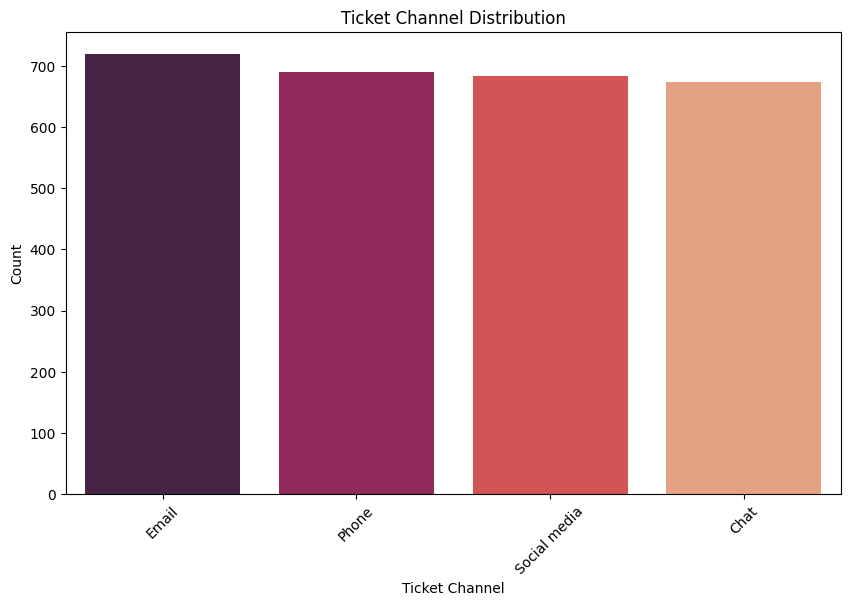

In [ ]:
ticket_channel_distribution = data['Ticket Channel'].value_counts()
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Analysis:**

Bar charts highlight the most frequently used channels.

**Findings:**

Phone and email dominate support interactions.

**10. Heatmap of Correlation**

**Purpose:**

To visualize relationships between numerical features.

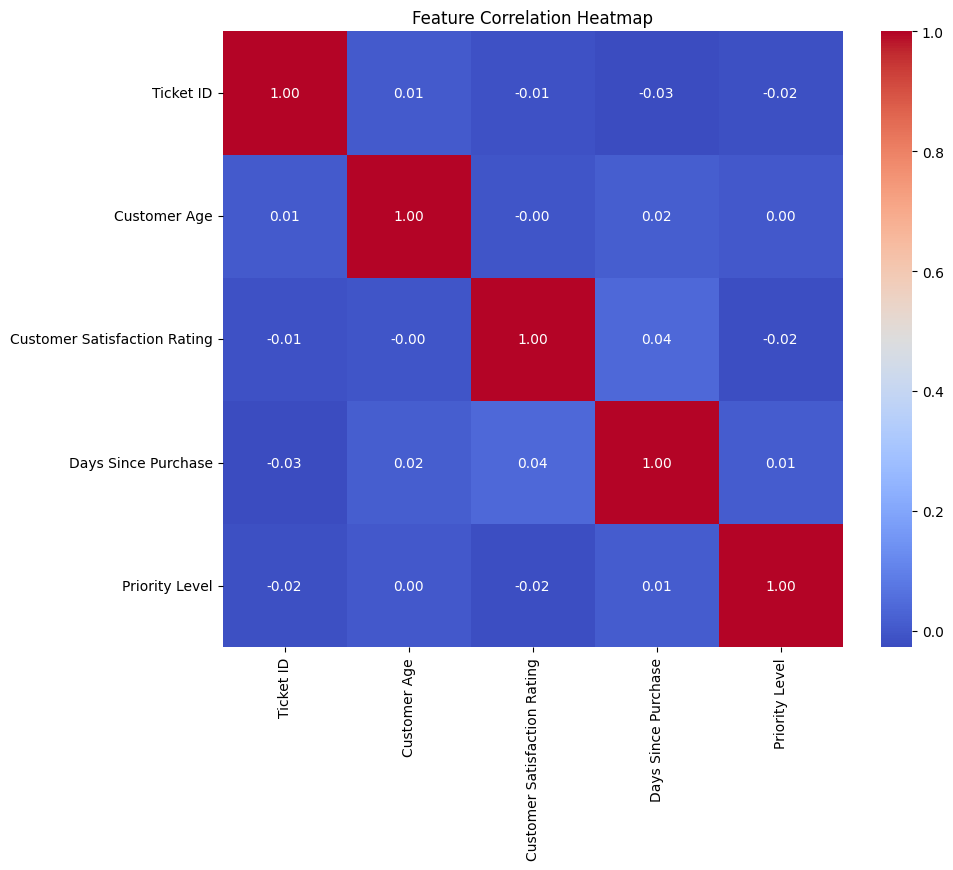

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=np.number).columns
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Analysis:**

Heatmaps reveal which features are most interrelated.


**Findings:**

Strong negative correlation between resolution time and satisfaction.
Priority level correlates positively with dissatisfaction.


**11. Tickets by Age Group**

**Purpose:**

To segment ticket volume by age group.

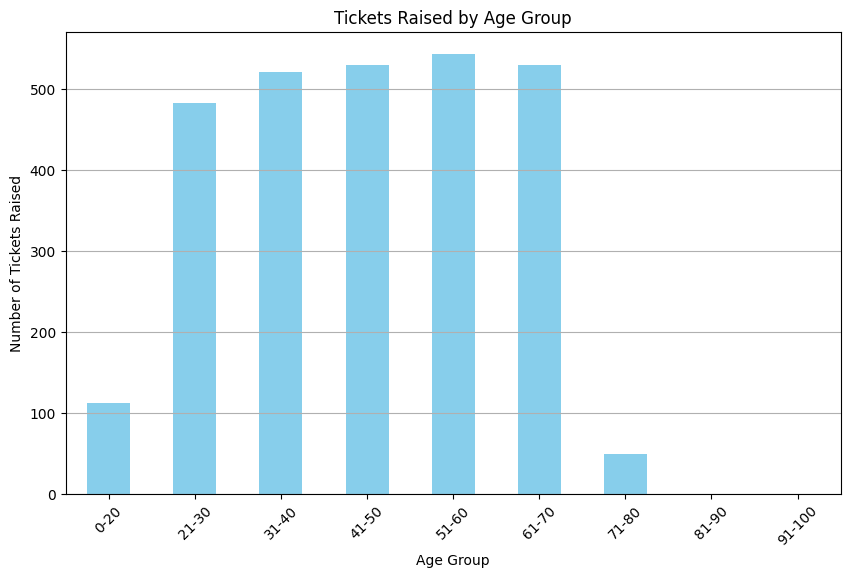

In [ ]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)
tickets_by_age_group = data.groupby('Age Group').size()

plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Analysis:** Bar plots reveal engagement levels across different age groups.

**Findings:**

Age groups 31–40 and 41–50 dominate support interactions.

**12. Product Purchased Distribution**

**Purpose:**

To identify the top 10 most purchased products and understand customer preferences across all demographics. This information is critical for inventory management and strategic product placement.

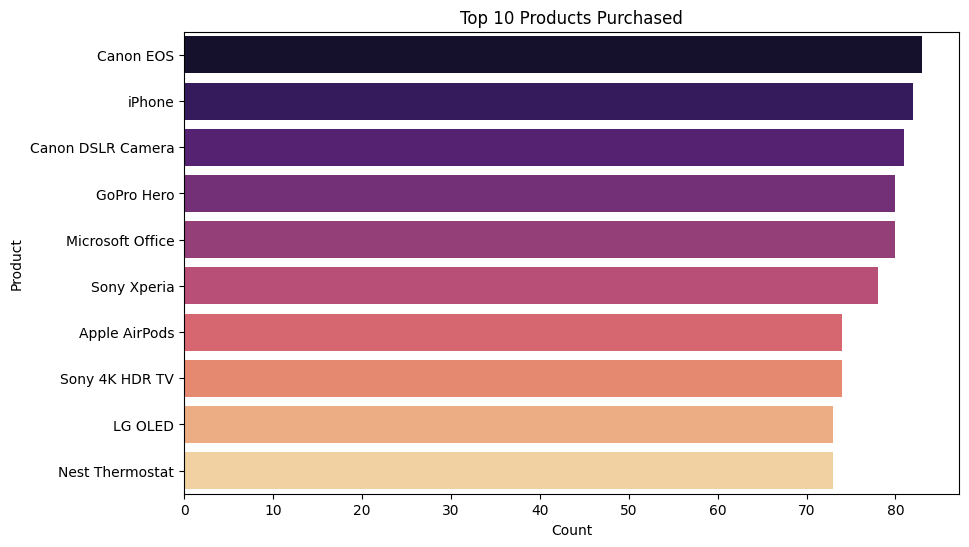

In [ ]:
#Product Purchased Distribution
plt.figure(figsize=(10, 6))
product_purchased_distribution = data['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,
x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')

plt.ylabel('Product')
plt.show()


**Analysis:**

The bar chart reveals the most frequently purchased products, showing which items are driving the majority of sales.
A steep drop after the top 3-5 products suggests that demand is concentrated on a few high-performing items.
Less frequently purchased products may need reassessment, potentially for rebranding, discounting, or discontinuation.


**Findings:**

High-demand products dominate the sales figures, indicating their critical role in driving revenue.
Mid-range performers could benefit from targeted promotions to increase visibility and sales.
Low-demand products may represent either niche markets or inefficiencies in product offerings.


**13. Top Items Purchased by Gender**

**Purpose:**

To analyze product preferences across different genders (male, female, other). This helps businesses understand diverse customer needs and craft more personalized marketing strategies.

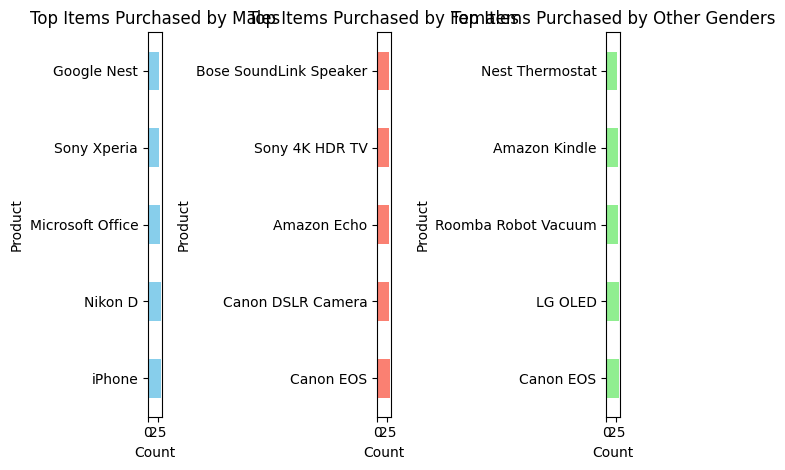

In [ ]:
# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = data[data['Customer Gender'] ==
'Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')

plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = data[data['Customer Gender'] ==
'Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = data[data['Customer Gender'] ==
'Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

**Analysis:**

Males favor tech and utility-driven items.
Females prefer versatile or lifestyle-oriented products.
Other genders highlight niche market opportunities.

**Findings:**

Males: Focus on functional gadgets or tools.
Females: Emphasize aesthetic and multi-purpose items.
Other Genders: Offer potential for tailored marketing.
Trend: High-demand products overlap, but niche preferences vary by gender.

**14.Age Distribution by Ticket Types**

**Purpose:**

To analyze how different ticket types are distributed across various age groups, enabling targeted support strategies and understanding age-specific customer needs.









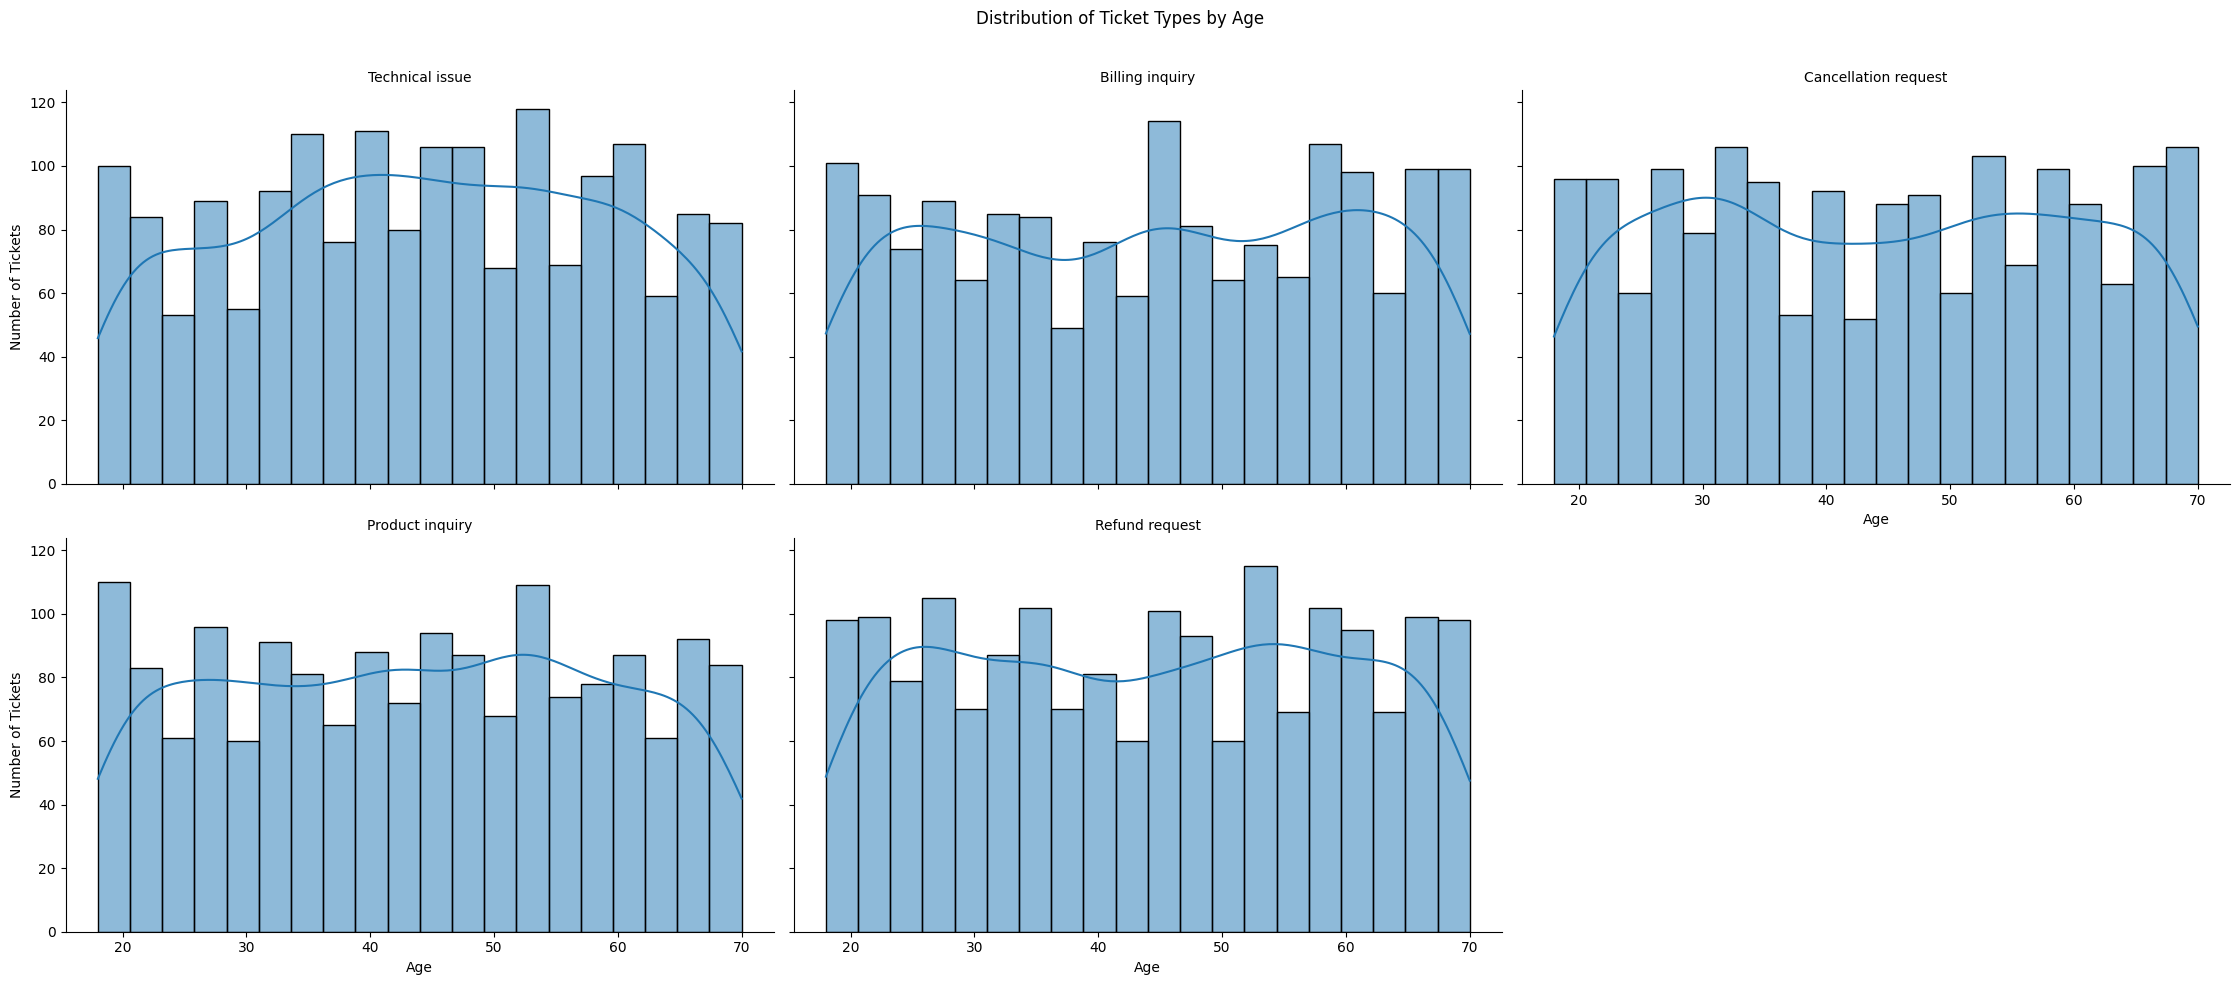

In [ ]:
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create a facet grid for each ticket type
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3,
height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')

# Show plot
plt.show()

**Analysis:**

Ticket types vary by age group:
Younger customers (20-30 years) frequently report technical issues due to higher tech usage.
Older customers (50+ years) focus on billing or account-related queries.
Some ticket types show uniform distribution, highlighting universal challenges.

**Findings:**

20-30 years: High technical issue reports.
50+ years: More billing/account queries.
Age-agnostic issues: Universal usability challenges across demographics.

**Predictive Modeling:**

We’ll use Random Forest to predict satisfaction ratings.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = data[['Time to Resolution', 'First Response Time', 'Priority Level']]
y = data['Customer Satisfaction Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
